In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import json
import pandas as pd
import random
from lib.cf_a.cfae import Simple_CF_Ascent

%load_ext autoreload
%autoreload 2 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Counterfactual-Ascent workspace

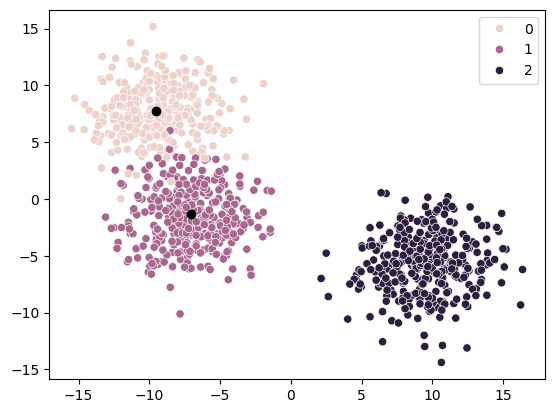

In [35]:
X, y, centers = make_blobs(centers=3, cluster_std=2.5, n_features=2, n_samples=1000, return_centers=True)

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.scatter(x=centers[0][0], y=centers[0][1],color="black")
plt.scatter(x=centers[1][0], y=centers[1][1],color="black")

In [39]:
model = KMeans(n_clusters=3)
model.fit(X)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,label
0,10.534159,-10.411166,0.0
1,-10.775611,9.250372,1.0
2,-6.535756,8.616116,1.0
3,6.812455,-6.152532,0.0
4,-8.797261,4.154550,1.0
...,...,...,...
995,9.721944,-9.318622,0.0
996,-8.465873,1.522839,2.0
997,-13.891971,5.211617,1.0
998,-9.062743,12.591669,1.0


In [46]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers, model=model, center_mode=False)

In [47]:
print(model.predict(np.array(cf).reshape(1,-1)))

[0]


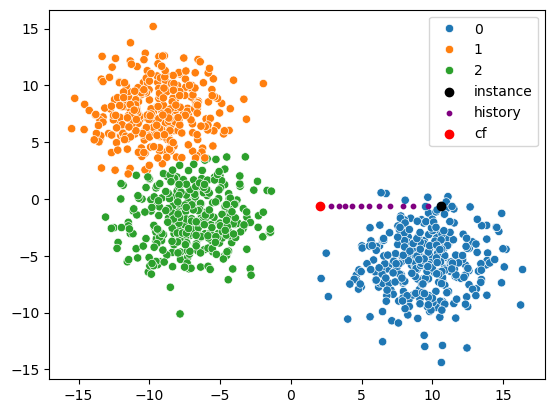

In [48]:
hx = list(zip(*h))[0]
hy = list(zip(*h))[1]

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=pred)
plt.scatter(x=x[0],y=x[1],color='black',label='instance')
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf[0],y=cf[1],color='red', label='cf')
plt.legend()

## PCA attempt

<Axes: >

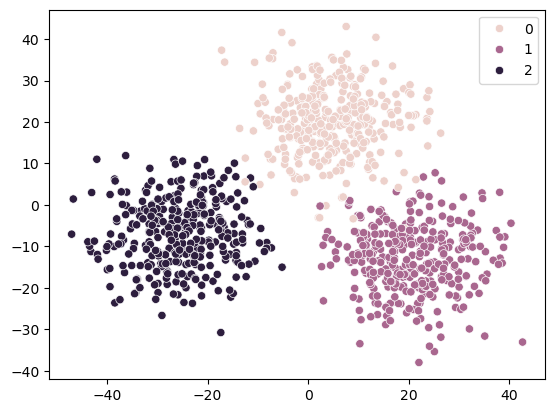

In [22]:
X, y, centers = make_blobs(centers=3, cluster_std=8, n_features=25, n_samples=1000, return_centers=True)

pca = PCA(n_components=2)
embed_X = pca.fit_transform(X)
sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=y)

In [23]:
model = RandomForestClassifier()
model.fit(X, y)
pred = model.predict(X)
pred = [str(l) for l in pred]
stacked = np.column_stack((X, pred))
df = pd.DataFrame(stacked, columns=[f'x{i+1}' for i in range(X.shape[1])]+['label'], dtype=float)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x17,x18,x19,x20,x21,x22,x23,x24,x25,label
0,-11.206347,9.056889,-20.330195,-2.322939,-7.198898,-28.864616,-14.302324,-1.607873,-11.488837,1.269131,...,-5.057801,7.780340,2.333062,14.364841,-13.188918,1.169693,-7.363578,3.949436,13.883894,2.0
1,7.682136,10.439464,-11.991769,-5.757136,4.016331,2.878811,-0.501303,-3.527512,-11.165833,-2.763124,...,1.797732,10.716536,-7.264791,4.263704,6.484605,5.242976,4.457914,-4.196102,12.046237,2.0
2,4.989326,-4.864835,0.708412,1.972732,3.821915,-1.782043,13.836627,12.960569,-8.912392,-5.827619,...,-2.514765,3.854854,-1.677482,15.895271,2.379297,-3.953295,-1.662073,-8.389768,21.068709,0.0
3,8.528365,-13.026092,0.386425,-9.676419,-9.073250,-3.142599,1.480493,5.997932,-13.954395,-15.612525,...,-12.559473,-4.465494,-6.443359,13.194598,10.027909,-2.798457,-3.573347,-6.255896,1.866169,0.0
4,-0.723290,-7.060409,-0.682781,-4.622943,-0.608690,7.216835,1.445516,7.705624,-2.565929,-0.570976,...,1.650325,-13.961136,-16.138290,0.250450,11.239328,-3.815235,4.490387,-7.417470,11.782746,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8.035581,-12.878767,-18.428169,-7.264174,7.617989,6.540276,-5.955825,12.799351,-2.216088,-20.040505,...,-10.927174,-14.518244,-12.943345,-3.534976,24.954148,-3.513618,19.583499,-12.270541,23.725738,0.0
996,-14.333006,-6.610575,-19.140098,-4.751738,-12.669798,0.720281,30.215026,0.811829,-17.869716,0.390881,...,-8.327088,-7.971082,-11.286835,1.583909,8.082457,-15.498515,4.350026,-3.449172,23.762725,0.0
997,11.841085,7.102788,-9.390517,-16.581939,1.964225,15.355984,14.290319,14.757858,-0.214495,0.893141,...,-14.534739,-3.451191,11.717256,-19.720409,-8.012554,-9.508868,-8.969683,-5.334448,6.216180,2.0
998,9.867411,-0.699749,-14.201587,4.652536,12.821487,-5.238711,-2.652986,-19.149619,-8.831530,-9.270966,...,-14.716487,16.076413,-3.450734,-7.303597,-2.934243,-6.209985,-8.248864,5.550093,17.260400,2.0


In [24]:
x,cf,h = Simple_CF_Ascent(df=df, target=1.0, centers=centers)

In [25]:
cf_pca = pca.transform([cf])[0]

h_pca = pca.transform(h)

hx = list(zip(*h_pca))[0]
hy = list(zip(*h_pca))[1]

x_pca = pca.transform([x])[0]

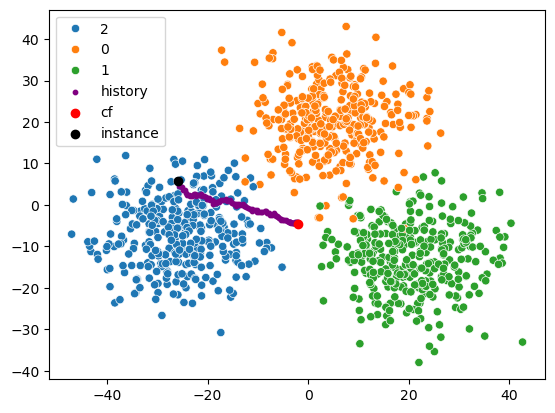

In [26]:

sns.scatterplot(x=embed_X[:, 0], y=embed_X[:, 1], hue=pred)
plt.scatter(x=hx, y=hy, color='purple', label='history',s=10)
plt.scatter(x=cf_pca[0],y=cf_pca[1],color='red', label='cf')
plt.scatter(x=x_pca[0],y=x_pca[1],color='black',label='instance')
plt.legend()